In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

## Block

In [47]:
def conv_maxpool_batchnorm_relu(x, filters, kernel_size):
    x = layers.Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    return x

## Concatenation Block

In [48]:
def layer_concate(tensor,filters):
    x=conv_maxpool_batchnorm_relu(tensor,filters,kernel_size=3)
    x=layers.Concatenate()([x,tensor])
    return x

## Model Input

In [49]:
inputs=layers.Input(shape=(224,224,3))

In [50]:
x=conv_maxpool_batchnorm_relu(inputs,filters=32,kernel_size=3)

In [51]:
x=layer_concate(x,filters=32)

In [52]:
x=layers.MaxPool2D(pool_size=(2,2))(x)

In [53]:
x=conv_maxpool_batchnorm_relu(x,filters=64,kernel_size=3)
x=layer_concate(x,filters=64)

In [54]:
x=layers.MaxPool2D(pool_size=(2,2))(x)

In [55]:
x=conv_maxpool_batchnorm_relu(x,filters=128,kernel_size=3)
x=layer_concate(x,filters=128)

In [56]:
x=layers.MaxPool2D(pool_size=(2,2))(x)

In [57]:
x=layers.Dropout(0.2)(x)

In [58]:
x=layers.Flatten()(x)

In [59]:
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(0.2)(x)

In [60]:
output=layers.Dense(6,activation='softmax')(x)

## Create Model

In [61]:
model=keras.Model(inputs,output,name='NewModel')

In [62]:
model.summary()

Model: "NewModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 224, 224, 32) 896         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 224, 224, 32) 128         conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 224, 224, 32) 9248        batch_normalization_12[0][0]     
___________________________________________________________________________________________

In [63]:
import time
t=time.time()

In [64]:
int(t)

1625053081

In [65]:
image_model_name='NewModel_'+str(int(t))+'.png'
image_model_name

'NewModel_1625053081.png'

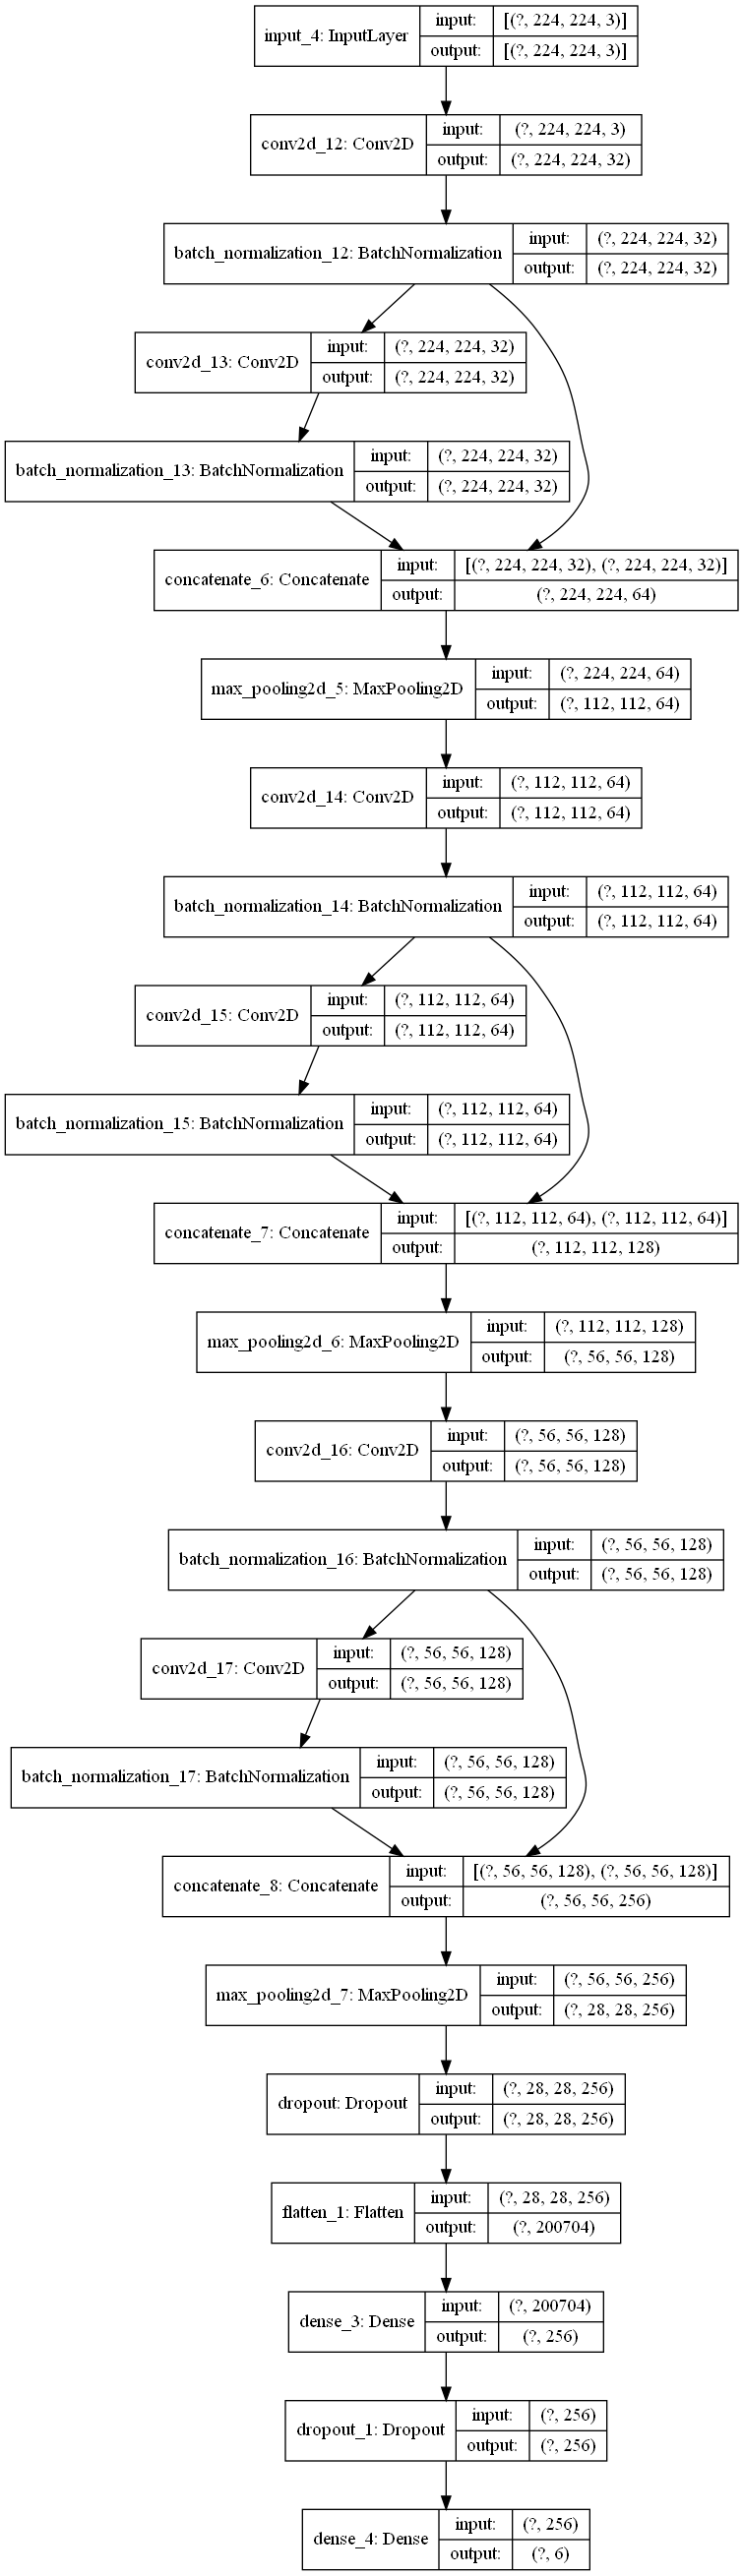

In [66]:
keras.utils.plot_model(model,image_model_name,show_shapes=True)